In [26]:
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt

In [49]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [50]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [51]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [52]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

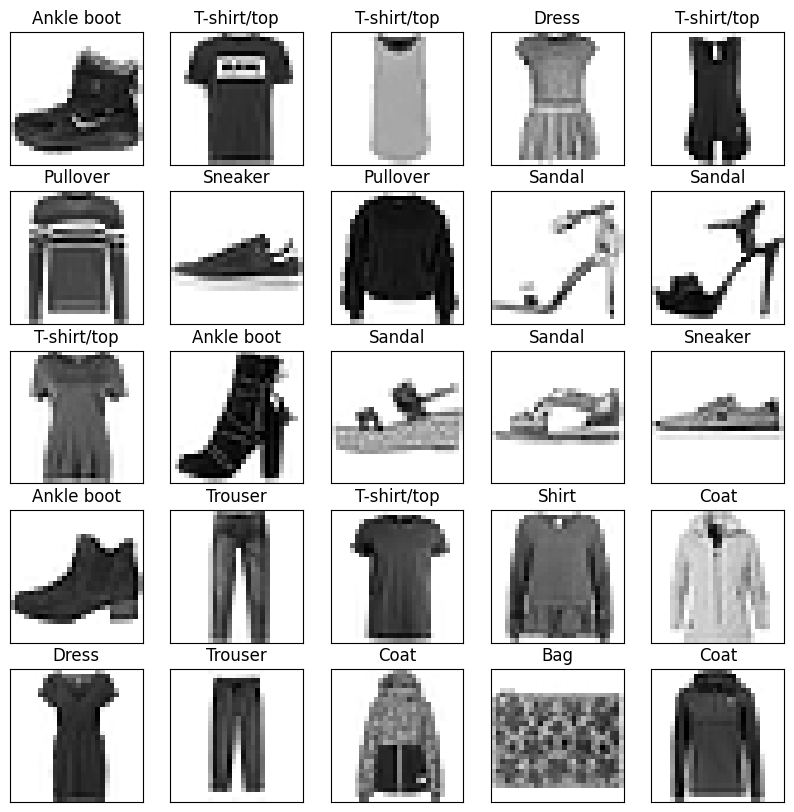

In [55]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    label_index = int(y_train[i])
    plt.title(class_names[label_index])
plt.show()

In [56]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [57]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [58]:
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 101s 53ms/step - loss: 0.3968 - accuracy: 0.8581 - val_loss: 0.3151 - val_accuracy: 0.8840
Epoch 2/10
1875/1875 [==============================] - 93s 50ms/step - loss: 0.2612 - accuracy: 0.9034 - val_loss: 0.2614 - val_accuracy: 0.9021
Epoch 3/10
1875/1875 [==============================] - 94s 50ms/step - loss: 0.2161 - accuracy: 0.9201 - val_loss: 0.2377 - val_accuracy: 0.9121
Epoch 4/10
1875/1875 [==============================] - 91s 49ms/step - loss: 0.1808 - accuracy: 0.9340 - val_loss: 0.2326 - val_accuracy: 0.9173
Epoch 5/10
1875/1875 [==============================] - 91s 49ms/step - loss: 0.1558 - accuracy: 0.9420 - val_loss: 0.2392 - val_accuracy: 0.9174
Epoch 6/10
1875/1875 [==============================] - 93s 50ms/step - loss: 0.1294 - accuracy: 0.9510 - val_loss: 0.2461 - val_accuracy: 0.9163
Epoch 7/10
1875/1875 [==============================] - 102s 55ms/step - loss: 0.1103 - accuracy: 0.9586 - val_loss: 0.2457

In [59]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=1)

print('\nTest loss:', test_loss)
print('\nTest accuracy:', test_acc)

313/313 [==============================] - 4s 13ms/step - loss: 0.3228 - accuracy: 0.9198

Test loss: 0.322792112827301

Test accuracy: 0.9197999835014343


In [60]:
predicted_classes = model.predict(x_test)
predicted_classes = np.argmax(predicted_classes, axis=1)

313/313 [==============================] - 5s 16ms/step


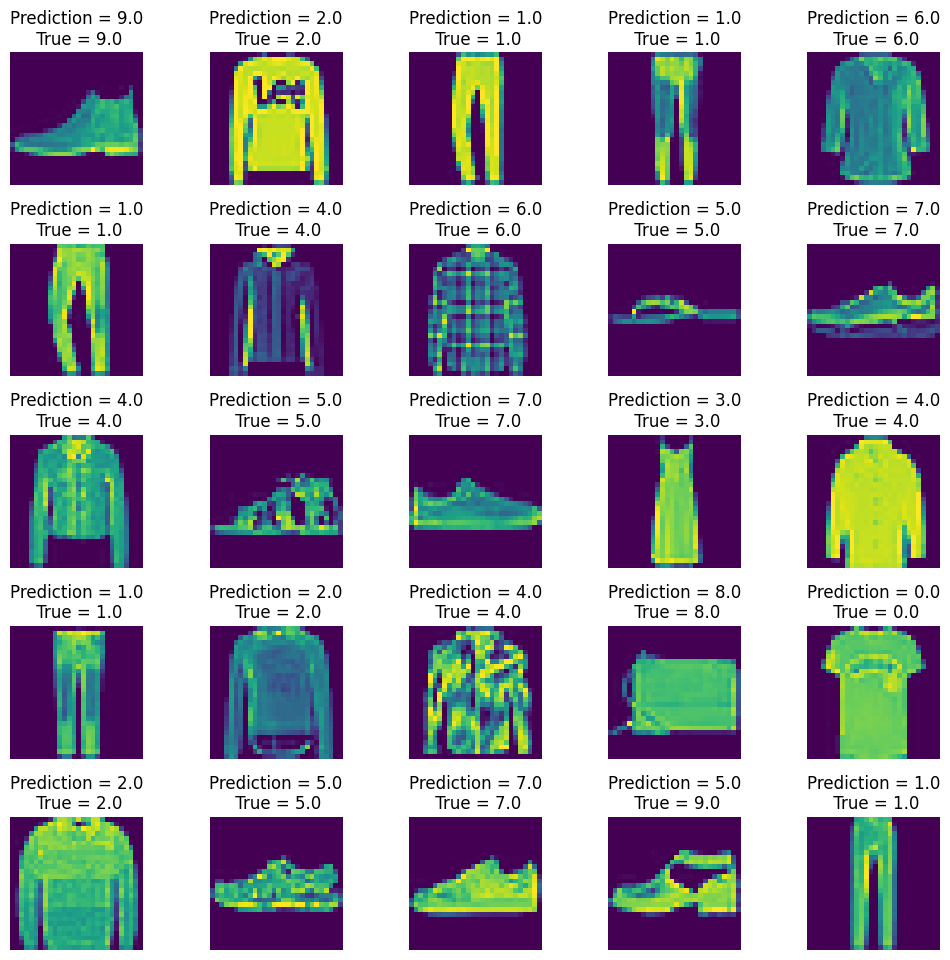

In [64]:
L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel()

for i in np.arange(0, L * W):  
    axes[i].imshow(x_test[i])
    axes[i].set_title(f"Prediction = {(predicted_classes[i]):0.1f}\n True = {y_test[i]:0.1f}")
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)